In [37]:
# Import dependencies

import numpy as np
import pandas as pd
import statsmodels.api as sm
import datetime
import yfinance as yf
import matplotlib.pyplot as plt

from scipy import stats


## Construction of an Optimal Portfolio

In [38]:
start = datetime.datetime(2022,5,1)
end = datetime.datetime(2025,5,1)
tickers = ["NVDA", "MSFT", "TSLA", "META"]

rf = 0.003

data_1 = yf.download(tickers,
                     start=start,
                     end=end)

C:\Users\marti\AppData\Local\Temp\ipykernel_22132\346577937.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_1 = yf.download(tickers,
[*********************100%***********************]  4 of 4 completed


In [39]:
data_1

Price            Close                                            High  \
Ticker            META        MSFT        NVDA        TSLA        META   
Date                                                                     
2022-05-02  209.978043  276.787933   19.500742  300.980011  210.723950   
2022-05-03  210.873123  274.170593   19.569626  303.083344  213.727459   
2022-05-04  222.191040  282.149170   20.300419  317.540009  223.076183   
2022-05-05  207.143600  269.860260   18.812880  291.093323  218.968727   
2022-05-06  202.658218  267.310974   18.644159  288.549988  208.237610   
...                ...         ...         ...         ...         ...   
2025-04-24  532.740112  386.590271  106.422607  259.510010  533.489536   
2025-04-25  546.849243  391.131958  111.002296  284.950012  549.437218   
2025-04-28  549.317322  390.443207  108.722450  285.880005  558.060594   
2025-04-29  554.013733  393.317932  109.012428  292.029999  556.142100   
2025-04-30  548.577881  394.535706  108.912437  282.160004  548.677780   

Price                                                  Low              \
Ticker            MSFT        NVDA        TSLA        META        MSFT   
Date                                                                     
2022-05-02  277.245242   19.541673  302.119995  199.893369  268.760723   
2022-05-03  276.457138   19.792259  308.026672  206.954618  272.584606   
2022-05-04  283.024860   20.366310  318.500000  205.830797  269.256983   
2022-05-05  278.617218   19.892094  315.200012  205.035172  266.931535   
2022-05-06  271.708902   19.479777  296.000000  199.923223  263.944389   
...                ...         ...         ...         ...         ...   
2025-04-24  387.738188  106.532600  259.540009  517.102120  374.502477   
2025-04-25  391.441388  111.912229  286.850006  535.837697  383.895243   
2025-04-28  392.020298  110.362336  294.859985  540.174393  385.931501   
2025-04-29  394.375987  110.192347  293.320007  543.701660  389.664635   
2025-04-30  395.933134  108.912437  284.450012  529.092874  383.735526   

Price                                     Open                          \
Ticker            NVDA        TSLA        META        MSFT        NVDA   
Date                                                                     
2022-05-02   18.360628  282.676666  200.072379  270.210477   18.510380   
2022-05-03   19.101401  296.196655  209.301742  276.291716   19.367960   
2022-05-04   18.720033  295.093323  209.500651  274.958721   19.890098   
2022-05-05   18.469448  285.899994  217.546536  277.829094   19.834191   
2022-05-06   17.960291  281.036682  206.208732  267.388801   18.705059   
...                ...         ...         ...         ...         ...   
2025-04-24  103.102838  249.199997  518.331155  375.011552  103.472815   
2025-04-25  105.722664  259.630005  546.379573  386.290839  106.842582   
2025-04-28  106.012632  272.420013  555.212810  391.241729  109.682383   
2025-04-29  107.432544  279.470001  545.580219  390.582932  107.662524   
2025-04-30  104.072777  270.779999  537.986055  389.584773  104.462749   

Price                     Volume                                  
Ticker            TSLA      META      MSFT       NVDA       TSLA  
Date                                                              
2022-05-02  286.923340  49915300  35151100  572049000   75781500  
2022-05-03  301.059998  41556300  25978600  475751000   63709500  
2022-05-04  301.313324  41375900  33599300  648855000   81643800  
2022-05-05  313.006653  41129200  43260400  626331000   92519100  
2022-05-06  295.666656  34747200  37780300  633297000   72903000  
...                ...       ...       ...        ...        ...  
2025-04-24  250.500000  13910000  22232300  220815000   94464200  
2025-04-25  261.690002  17098900  18973200  251064700  167560700  
2025-04-28  288.980011  15179000  16579400  207708500  151731800  
2025-04-29  285.500000  11835000  14974000  170444300  108906600  
2025-04-30  279.89

In [40]:
## Flatten column names
data_1.columns = [f"{level1}_{level2}" for level1, level2 in data_1.columns]

In [41]:
data_1.head(5)

,Close_META,Close_MSFT,Close_NVDA,Close_TSLA,High_META,High_MSFT,High_NVDA,High_TSLA,Low_META,Low_MSFT,Low_NVDA,Low_TSLA,Open_META,Open_MSFT,Open_NVDA,Open_TSLA,Volume_META,Volume_MSFT,Volume_NVDA,Volume_TSLA
Date,,,,,,,,,,,,,,,,,,,,
2022-05-02,209.978043,276.787933,19.500742,300.980011,210.723950,277.245242,19.541673,302.119995,199.893369,268.760723,18.360628,282.676666,200.072379,270.210477,18.510380,286.923340,49915300,35151100,572049000,75781500
2022-05-03,210.873123,274.170593,19.569626,303.083344,213.727459,276.457138,19.792259,308.026672,206.954618,272.584606,19.101401,296.196655,209.301742,276.291716,19.367960,301.059998,41556300,25978600,475751000,63709500
2022-05-04,222.191040,282.149170,20.300419,317.540009,223.076183,283.024860,20.366310,318.500000,205.830797,269.256983,18.720033,295.093323,209.500651,274.958721,19.890098,301.313324,41375900,33599300,648855000,81643800
2022-05-05,207.143600,269.860260,18.812880,291.093323,218.968727,278.617218,19.892094,315.200012,205.035172,266.931535,18.469448,285.899994,217.546536,277.829094,19.834191,313.006653,41129200,43260400,626331000,92519100
2022-05-06,202.658218,267.310974,18.644159,288.549988,208.237610,271.708902,19.479777,296.000000,199.923223,263.944389,17.960291,281.036682,206.208732,267.388801,18.705059,295.666656,34747200,37780300,633297000,72903000


In [42]:
# Different ways of doing pct_change

"""
data_1["ret_META"] = data_1["Close_META"].diff()/data_1["Close_META"].shift(1)

data_1["ret_MSFT"] = data_1["Close_MSFT"].diff()/data_1["Close_MSFT"].shift(1)

data_1["ret_NVDA"] = data_1["Close_NVDA"].diff()/data_1["Close_NVDA"].shift(1)

data_1["ret_TSLA"] = data_1["Close_TSLA"].diff()/data_1["Close_TSLA"].shift(1)
"""
data_1["ret_META"] = data_1["Close_META"].pct_change()

data_1["ret_MSFT"] = data_1["Close_MSFT"].pct_change()

data_1["ret_NVDA"] = data_1["Close_NVDA"].pct_change()

data_1["ret_TSLA"] = data_1["Close_TSLA"].pct_change()

data_1 = data_1.dropna()
data_1.reset_index()

,Date,Close_META,Close_MSFT,Close_NVDA,Close_TSLA,High_META,High_MSFT,High_NVDA,High_TSLA,Low_META,...,Open_NVDA,Open_TSLA,Volume_META,Volume_MSFT,Volume_NVDA,Volume_TSLA,ret_META,ret_MSFT,ret_NVDA,ret_TSLA
0,2022-05-03,210.873123,274.170593,19.569626,303.083344,213.727459,276.457138,19.792259,308.026672,206.954618,...,19.367960,301.059998,41556300,25978600,475751000,63709500,0.004263,-0.009456,0.003532,0.006988
1,2022-05-04,222.191040,282.149170,20.300419,317.540009,223.076183,283.024860,20.366310,318.500000,205.830797,...,19.890098,301.313324,41375900,33599300,648855000,81643800,0.053672,0.029101,0.037343,0.047699
2,2022-05-05,207.143600,269.860260,18.812880,291.093323,218.968727,278.617218,19.892094,315.200012,205.035172,...,19.834191,313.006653,41129200,43260400,626331000,92519100,-0.067723,-0.043555,-0.073276,-0.083286
3,2022-05-06,202.658218,267.310974,18.644159,288.549988,208.237610,271.708902,19.479777,296.000000,199.923223,...,18.705059,295.666656,34747200,37780300,633297000,72903000,-0.021653,-0.009447,-0.008968,-0.008737
4,2022-05-09,195.139465,257.434998,16.922009,262.369995,201.464765,265.004897,18.224852,281.876678,194.512898,...,18.004218,278.816681,36303200,47726000,644455000,90810300,-0.037101,-0.036946,-0.092369,-0.090729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,2025-04-24,532.740112,386.590271,106.422607,259.510010,533.489536,387.738188,106.532600,259.540009,517.102120,...,103.472815,250.500000,13910000,22232300,220815000,94464200,0.024756,0.034483,0.036218,0.034976
747,2025-04-25,546.849243,391.131958,111.002296,284.950012,549.437218,391.441388,111.912229,286.850006,535.837697,...,106.842582,261.690002,17098900,18973200,251064700,167560700,0.026484,0.011748,0.043033,0.098031
748,2025-04-28,549.317322,390.443207,108.722450,285.880005,558.060594,392.020298,110.362336,294.859985,540.174393,...,109.682383,288.980011,15179000,16579400,207708500,151731800,0.004513,-0.001761,-0.020539,0.003264
749,2025-04-29,554.013733,393.317932,109.012428,292.029999,556.142100,394.375987,110.192347,293.320007,543.701660,...,107.662524,285.500000,11835000,14974000,170444300,108906600,0.008550,0.007363,0.002667,0.021513


In [43]:
returns = data_1[["ret_META", "ret_MSFT", "ret_NVDA", "ret_TSLA"]]

cov_matrix = returns.cov()

num_portfolios = 70000 # Starting monte carlo simulation

In [44]:
weights_portfolios = np.zeros((num_portfolios, 4))
returns_portfolios = np.zeros(num_portfolios)
volatility_portfolios = np.zeros(num_portfolios)
sharpe_ratio_portfolios = np.zeros(num_portfolios)

for i in range(num_portfolios):
    weights = np.random.random(4)
    weights /= np.sum(weights)

    returns_portfolios[i] = np.sum(returns.mean() * weights) * 252 # of days market is open - expected return
    volatility_portfolios[i] = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    sharpe_ratio_portfolios[i] = (returns_portfolios[i] - rf) / volatility_portfolios[i]
    weights_portfolios[i, :] = weights

max_sharpe_idx = np.argmax(sharpe_ratio_portfolios)
max_sharpe_returns = returns_portfolios[max_sharpe_idx]
max_sharpe_volatility = volatility_portfolios[max_sharpe_idx]
max_sharpe_weights = weights_portfolios[max_sharpe_idx]    

In [45]:
print("Optimal Portfolio")
print("-----------------")
print("Expected Annual Return:", round(max_sharpe_returns, 4))
print("Annual Volatility     :", round(max_sharpe_volatility, 4))
print("Sharpe Ratio          :", round(sharpe_ratio_portfolios[max_sharpe_idx], 4))
print("Asset Weights:")
for i in range(len(tickers)):
    print(f"{tickers[i]:<6}: {round(max_sharpe_weights[i], 4)}")

Optimal Portfolio
-----------------
Expected Annual Return: 0.6254
Annual Volatility     : 0.4656
Sharpe Ratio          : 1.3366
Asset Weights:
NVDA  : 0.3412
MSFT  : 0.0002
TSLA  : 0.6541
META  : 0.0045


Model is heavily concentrated in TSLA and NVDA, which are high growth and high volatility, meaning it explains both a high return and a high risk.

This portfolio is ideal to someone who has a high risk tolerance.

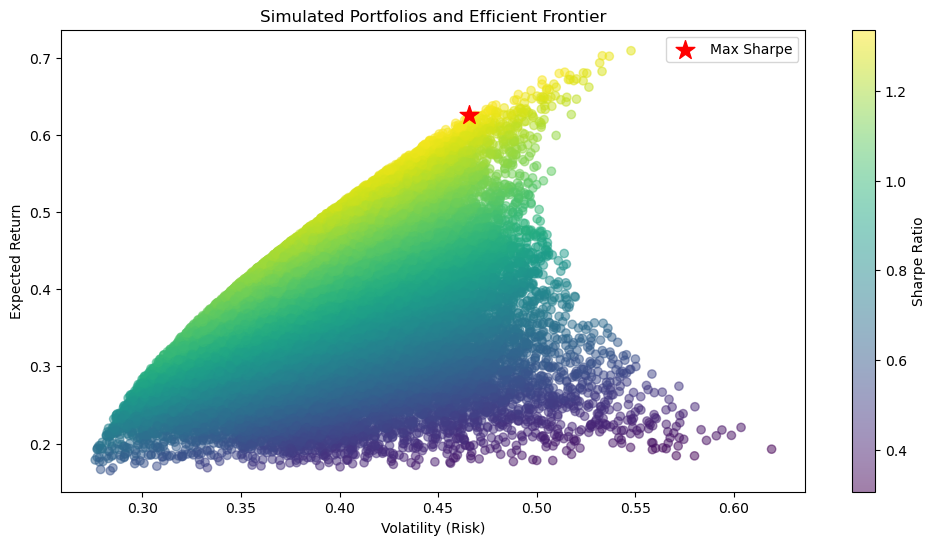

In [46]:
plt.figure(figsize=(12,6))
plt.scatter(volatility_portfolios, returns_portfolios, c=sharpe_ratio_portfolios, cmap="viridis", alpha=0.5)
plt.colorbar(label="Sharpe Ratio")
plt.scatter(max_sharpe_volatility, max_sharpe_returns, c="red", marker="*", s=200, label="Max Sharpe")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Expected Return")
plt.title("Simulated Portfolios and Efficient Frontier")
plt.legend()
plt.show()